In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/preprocesseddata1.csv')
def check_preprocessed_data(df):
    print(" Basic Info:")
    print(df.info())

    print("\n Missing Values:")
    print(df.isnull().sum())

    print("\n Duplicate Rows:")
    print(f"Total Duplicates: {df.duplicated().sum()}")

    print("\n Descriptive Stats (Numerical Columns):")
    print(df.describe())

    print("\n Unique Values Per Column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    print("\n Checking for Outliers (Z-score method):")
    from scipy import stats
    numeric_cols = df.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(numeric_cols))
    outliers = (z_scores > 3).sum()
    print(outliers)

    print("\n Data Types:")
    print(df.dtypes)

    print("\n Sample Rows:")
    print(df.head())
check_preprocessed_data(df)

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43674 entries, 0 to 43673
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 38.3 MB
None

 Missing Values:
MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_std           0
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
Length: 115, dtype: int64

 Duplicate Rows:
Total Duplicates: 0

 Descriptive Stats (Numerical Columns):
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count      4.367400e+04    4.367400e+04        4.367400e+04      4.367400e+04   
mean      -3.904617e-18    6.507696e-17        4.164925e-17      8.460004e-18   
std        1.000011e+00    1.000011e+00        1.000011e+00      1.000011e+00   
min       -1.964559e+00   -6.490453e-02       -2.439304e-01   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43674 entries, 0 to 43673
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 38.3 MB
None
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count      4.367400e+04    4.367400e+04        4.367400e+04      4.367400e+04   
mean      -3.904617e-18    6.507696e-17        4.164925e-17      8.460004e-18   
std        1.000011e+00    1.000011e+00        1.000011e+00      1.000011e+00   
min       -1.964559e+00   -6.490453e-02       -2.439304e-01     -2.290389e+00   
25%       -8.366973e-01   -6.490453e-02       -2.439304e-01     -8.490372e-01   
50%        6.569666e-02   -6.490128e-02       -2.439183e-01      4.186165e-02   
75%        8.256523e-01   -5.532302e-02       -2.034057e-01      8.409083e-01   
max        2.413605e+00    1.439170e+02        2.896094e+01      2.282073e+00   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count    4

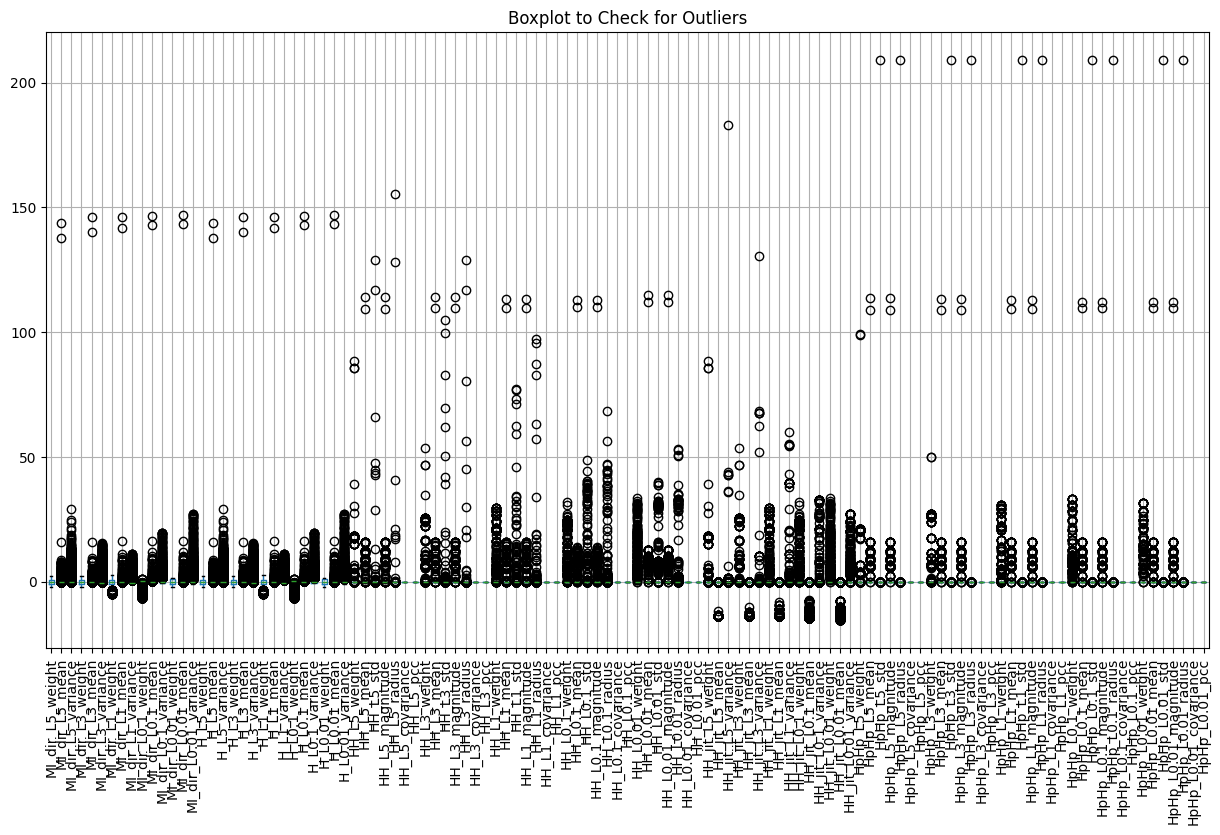


✅ Preprocessed data saved successfully as '/libx32/preprocesseddata1.csv'!
   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         -1.964559       -0.064905            -0.24393         -2.290389   
1         -1.935675       -0.064905            -0.24393         -2.263637   
2         -1.906792       -0.064905            -0.24393         -2.236885   
3         -1.877909       -0.064905            -0.24393         -2.210133   
4         -1.849388       -0.064905            -0.24393         -2.183582   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       -0.067061           -0.316486         -4.953123        -0.07045   
1       -0.067061           -0.316486         -4.928597        -0.07045   
2       -0.067061           -0.316486         -4.904070        -0.07045   
3       -0.067061           -0.316486         -4.879544        -0.07045   
4       -0.067061           -0.316486         -4.855079        -0.07045   

   MI_dir_

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/preprocesseddata1.csv'
df = pd.read_csv(file_path)
print(df.info())
print(df.describe())
if 'Attack' in df.columns:
    le = LabelEncoder()
    df['Attack_encoded'] = le.fit_transform(df['Attack'])
feature_columns = df.select_dtypes(include=['int64', 'float64']).columns
feature_columns = [col for col in feature_columns if col not in ['Label', 'Attack_encoded']]
scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])
plt.figure(figsize=(15, 8))
df[feature_columns].boxplot(rot=90)
plt.title("Boxplot to Check for Outliers")
plt.show()
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
output_file_path = '/libx32/preprocesseddata1.csv'
df.to_csv(output_file_path, index=False)
print(f"\n Preprocessed data saved successfully as '{output_file_path}'!")
print(df.head())
print(df.shape)



 Training on Isolation Forest Labels 
Decision Tree (IF) Accuracy: 0.9985
Random Forest (IF) Accuracy: 0.9987

 Training on One-Class SVM Labels 
Decision Tree (SVM) Accuracy: 0.9966
Random Forest (SVM) Accuracy: 0.9977


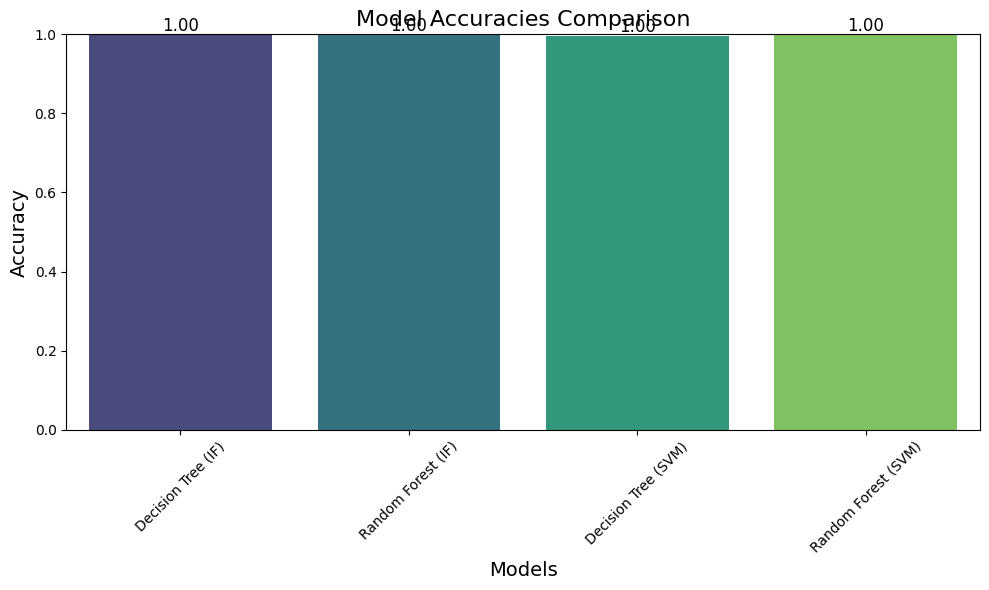

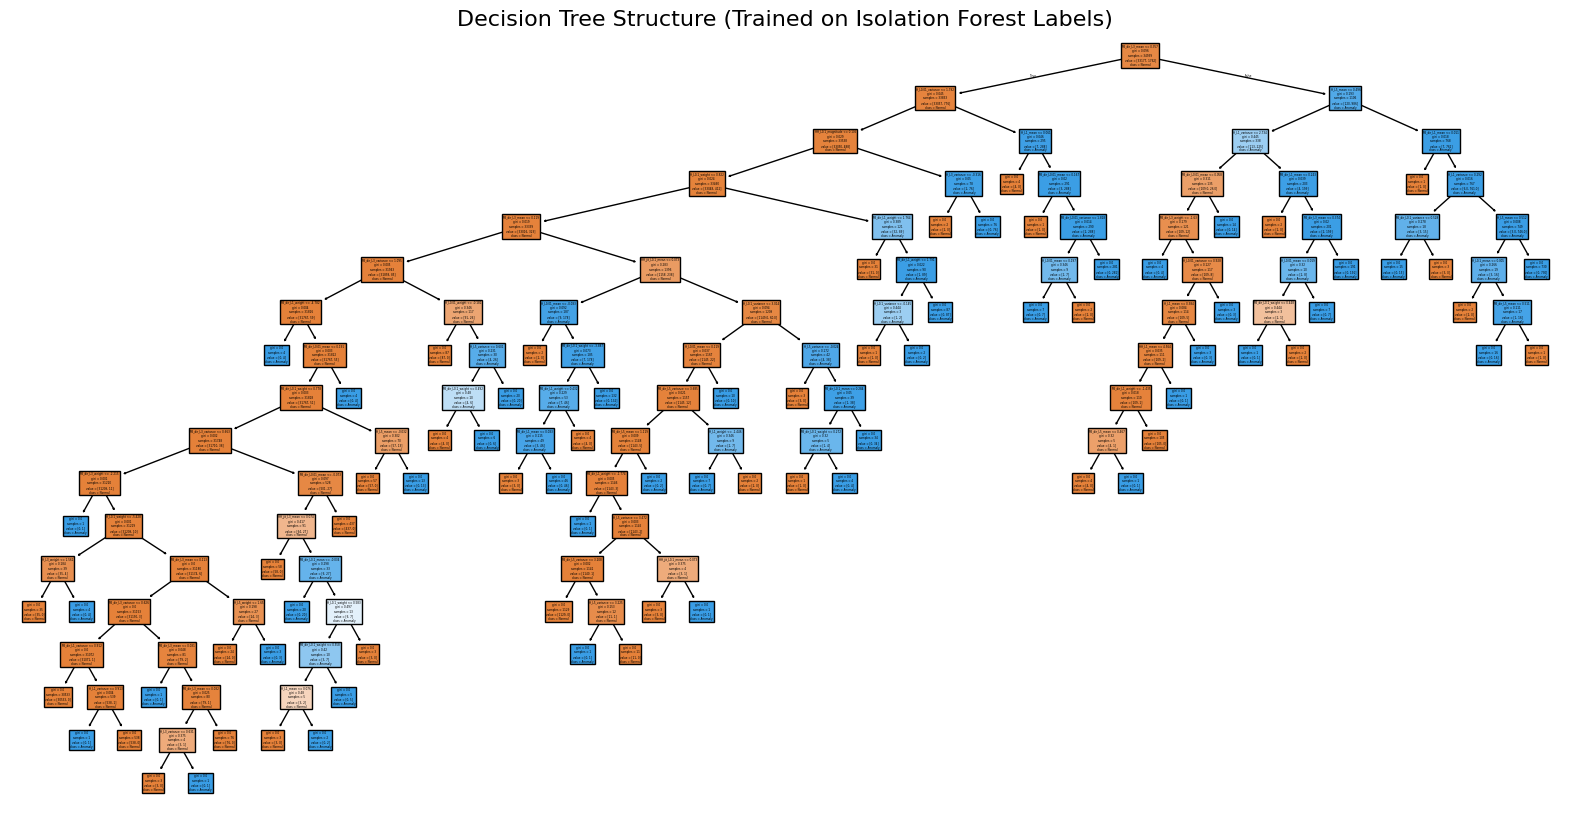

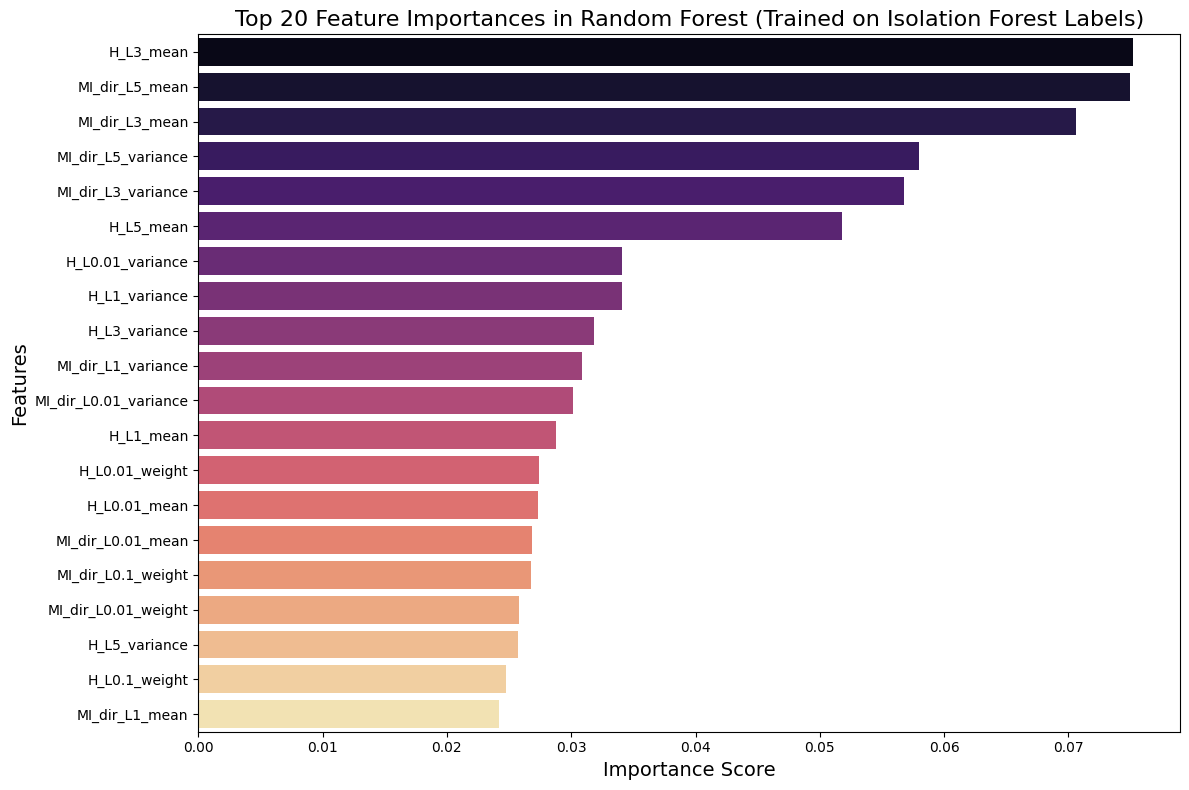

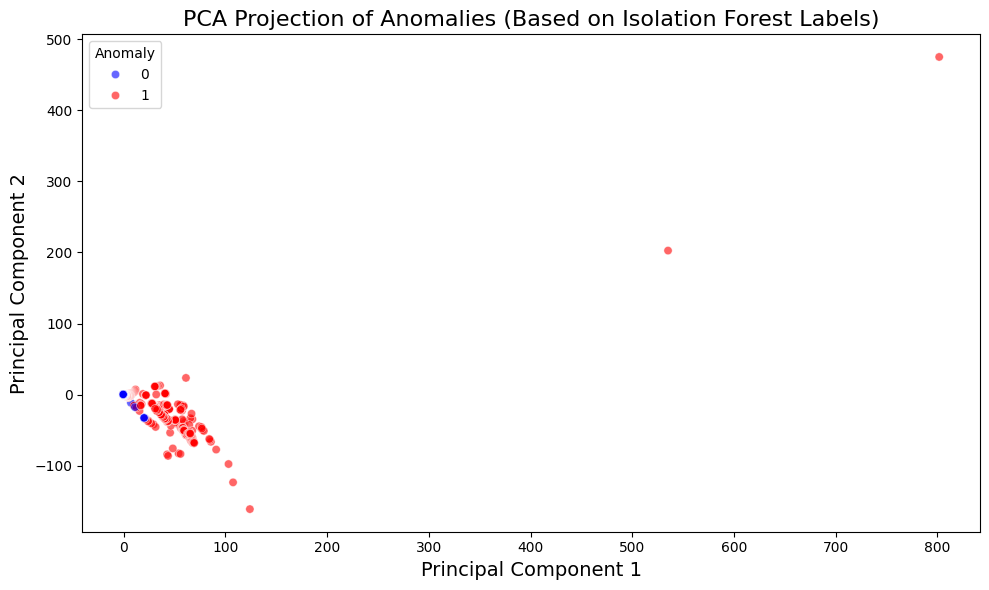

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/preprocesseddata1.csv')
X = df.copy()
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(X)
iso_labels = pd.Series(iso_labels).map({1: 0, -1: 1})
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
svm_labels = svm.fit_predict(X)
svm_labels = pd.Series(svm_labels).map({1: 0, -1: 1})
def evaluate_model(name, model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    return acc, model, X_test, y_test, preds
accuracies = {}
models = {}
print("\n Training on Isolation Forest Labels ")
acc, dtree_if, X_test_if, y_test_if, preds_if = evaluate_model("Decision Tree (IF)", DecisionTreeClassifier(random_state=42), X, iso_labels)
accuracies["Decision Tree (IF)"] = acc
models["Decision Tree (IF)"] = dtree_if
acc, rf_if, _, _, _ = evaluate_model("Random Forest (IF)", RandomForestClassifier(random_state=42), X, iso_labels)
accuracies["Random Forest (IF)"] = acc
models["Random Forest (IF)"] = rf_if
print("\n Training on One-Class SVM Labels ")
acc, dtree_svm, X_test_svm, y_test_svm, preds_svm = evaluate_model("Decision Tree (SVM)", DecisionTreeClassifier(random_state=42), X, svm_labels)
accuracies["Decision Tree (SVM)"] = acc
models["Decision Tree (SVM)"] = dtree_svm
acc, rf_svm, _, _, _ = evaluate_model("Random Forest (SVM)", RandomForestClassifier(random_state=42), X, svm_labels)
accuracies["Random Forest (SVM)"] = acc
models["Random Forest (SVM)"] = rf_svm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title("Model Accuracies Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0, 1)
for index, value in enumerate(accuracies.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
plot_tree(dtree_if, feature_names=X.columns, class_names=["Normal", "Anomaly"], filled=True)
plt.title("Decision Tree Structure (Trained on Isolation Forest Labels)", fontsize=16)
plt.show()
importances = rf_if.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values[:20], y=feature_importances.index[:20], palette='magma')
plt.title("Top 20 Feature Importances in Random Forest (Trained on Isolation Forest Labels)", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()
df_pca = df.copy()
df_pca['anomaly'] = iso_labels
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca.drop(columns='anomaly'))
df_pca['pca1'] = pca_result[:, 0]
df_pca['pca2'] = pca_result[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='anomaly', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title("PCA Projection of Anomalies (Based on Isolation Forest Labels)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(title='Anomaly')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
data_path = "/content/preprocesseddata1.csv"
df = pd.read_csv(data_path)
X = df.values
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
pseudo_labels = iso_forest.fit_predict(X)
pseudo_labels = (pseudo_labels == 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, pseudo_labels, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.4f}")
print(" Classification Report:")
print(classification_report(y_test, y_pred))
save_dir = "/libx32/trainingdata"
os.makedirs(save_dir, exist_ok=True)
joblib.dump(dt_model, os.path.join(save_dir, "decision_tree_model.pkl"))
joblib.dump(iso_forest, os.path.join(save_dir, "isolation_forest_model.pkl"))
train_df = pd.DataFrame(X_train, columns=df.columns)
train_df["label"] = y_train
train_df.to_csv(os.path.join(save_dir, "training_data_with_labels.csv"), index=False)
print(f"\n Model and training data saved to '{save_dir}'")



 Model Accuracy: 0.9894
 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       743
           1       0.99      0.99      0.99      7992

    accuracy                           0.99      8735
   macro avg       0.97      0.96      0.97      8735
weighted avg       0.99      0.99      0.99      8735


 Model and training data saved to '/libx32/trainingdata'


In [17]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
model_path = "/content/decision_tree_model.pkl"
dt_model = joblib.load(model_path)
y_pred = dt_model.predict(X_test)
print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Model Accuracy: 0.9893531768746422

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       743
           1       0.99      0.99      0.99      7992

    accuracy                           0.99      8735
   macro avg       0.97      0.96      0.97      8735
weighted avg       0.99      0.99      0.99      8735



In [18]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
model_path = "/content/isolation_forest_model.pkl"
dt_model = joblib.load(model_path)
y_pred = dt_model.predict(X_test)
print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Model Accuracy: 0.9149398969662278

 Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       743
           1       1.00      1.00      1.00      7992

    accuracy                           0.91      8735
   macro avg       0.33      0.33      0.33      8735
weighted avg       0.91      0.91      0.91      8735



 Dataset Loaded Successfully.

 First 5 Rows:
   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         -1.401938       -0.051242           -0.162099         -1.396868   
1          0.414777        0.084334            0.703583          0.356479   
2          1.284207       -0.058597           -0.203434          1.313432   
3          0.953513       -0.064905           -0.243930          1.033266   
4          0.778856       -0.064905           -0.243930          0.796876   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       -0.026655           -0.029791         -1.355354       -0.022510   
1        0.079532            0.767095          0.331165        0.059370   
2       -0.048280           -0.173492          1.341595       -0.023942   
3       -0.067061           -0.316486          0.972798       -0.070425   
4       -0.067061           -0.316486          0.749867       -0.070450   

   MI_dir_L1_variance  MI_dir_L0.1_weigh

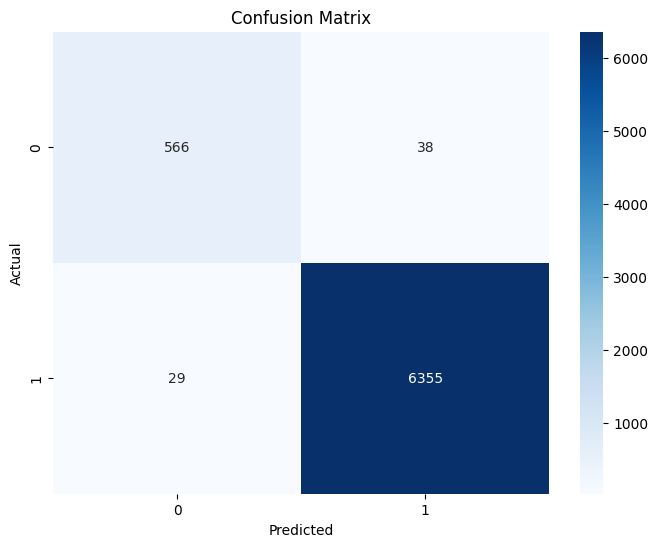

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('/content/training_data_with_labels.csv')
print(" Dataset Loaded Successfully.")
print("\n First 5 Rows:")
print(data.head())
print("\n Columns in the Dataset:")
print(data.columns)
print("\n Data Info:")
print(data.info())
label_column = 'label'
X = data.drop(columns=[label_column])
y = data[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n Data Split into Train and Test Sets.")
optimized_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
optimized_model.fit(X_train, y_train)
print("\n Model Trained Successfully.")
y_pred = optimized_model.predict(X_test)
print("\n Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [21]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("/content/training_data_with_labels.csv")
X = df.drop(columns=["label"], errors="ignore")
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}
dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
joblib.dump(best_model, "/content/optimized_decision_tree_model.pkl")


Accuracy: 0.9971379507727532
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       604
           1       1.00      1.00      1.00      6384

    accuracy                           1.00      6988
   macro avg       0.99      0.99      0.99      6988
weighted avg       1.00      1.00      1.00      6988



['/content/optimized_decision_tree_model.pkl']

Dataset Loaded Successfully.

First 5 Rows:
   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         -1.401938       -0.051242           -0.162099         -1.396868   
1          0.414777        0.084334            0.703583          0.356479   
2          1.284207       -0.058597           -0.203434          1.313432   
3          0.953513       -0.064905           -0.243930          1.033266   
4          0.778856       -0.064905           -0.243930          0.796876   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       -0.026655           -0.029791         -1.355354       -0.022510   
1        0.079532            0.767095          0.331165        0.059370   
2       -0.048280           -0.173492          1.341595       -0.023942   
3       -0.067061           -0.316486          0.972798       -0.070425   
4       -0.067061           -0.316486          0.749867       -0.070450   

   MI_dir_L1_variance  MI_dir_L0.1_weight 

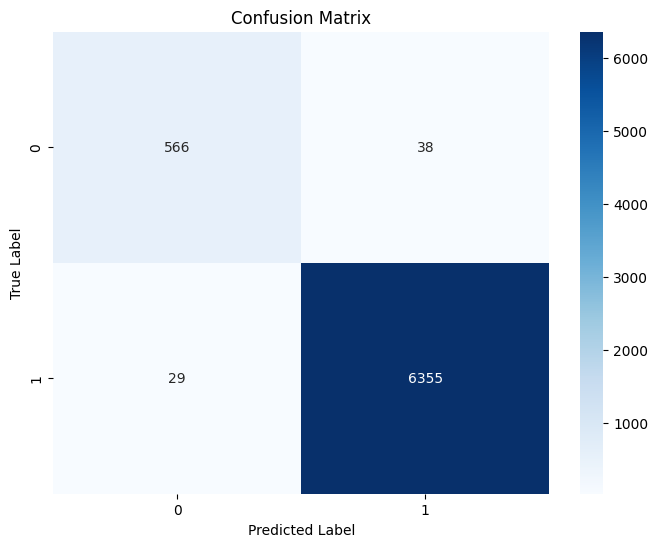

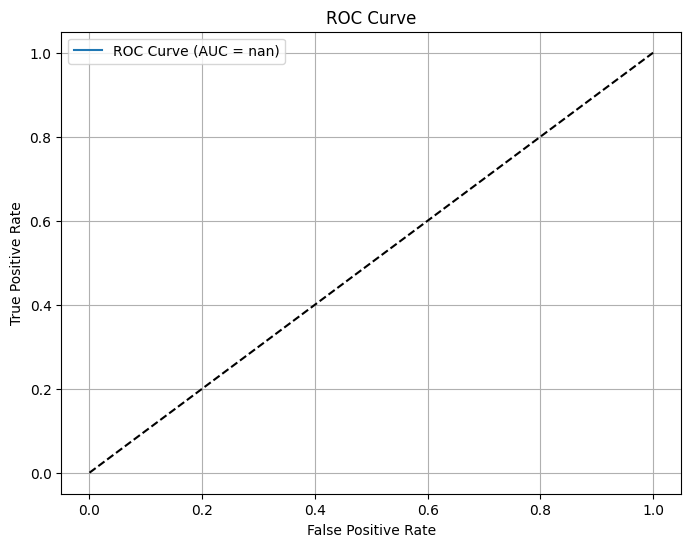

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
data = pd.read_csv('/content/training_data_with_labels.csv')
print("Dataset Loaded Successfully.")
print("\nFirst 5 Rows:")
print(data.head())
print("\nColumns in the Dataset:")
print(data.columns)
print("\nData Info:")
print(data.info())
label_column = 'label'
X = data.drop(columns=[label_column])
y = data[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split into Train and Test Sets.")
optimized_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
optimized_model.fit(X_train, y_train)
print("\nModel Trained Successfully.")
y_pred = optimized_model.predict(X_test)
print("\nEvaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
if len(np.unique(y)) == 2:
    anomaly_class = 'anomaly'
    y_test_binary = (y_test == anomaly_class).astype(int)
    if hasattr(optimized_model, "predict_proba"):
        y_pred_proba = optimized_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Model does not support probability prediction; ROC curve skipped.")
else:
    print("ROC curve skipped: target is not binary.")
